# PYTN_Assgn_1_Batch 5_Ahmad Fadillah

# Import Package

<h10> Install Package

In [1]:
# Install Pandas
!pip install pandas

In [2]:
# Install Numpy
!pip install numpy

In [3]:
# Install Matplotlib
!pip install matplotlib

In [4]:
# Install Seaborn
!pip install seaborn

In [5]:
# Install WordCloud
!pip install wordcloud

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Preprocessing Dataset

In [7]:
# Membuka File dataset dengan Pandas
df = pd.read_csv('london_crime_by_lsoa.csv')


# Penjelasan pada masing-masing feature
# lsoa_code         : this represents a policing area
# borough           : the london borought for which the static is related
# major_category    : the major crime category
# minor_category    : the minor crime category
# value             : the count of the crime for that particular borough, in that particular month
# year              : the year of the summary static
# month             : the month of the summary static

In [8]:
# Cek jumlah baris dan kolom
row, col = df.shape

print('Jumlah Baris : ', row)
print('Jumlah Kolom : ', col)

Jumlah Baris :  13490604
Jumlah Kolom :  7


In [9]:
# Cek tipe data pada masing kolom
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB
None


In [10]:
# CeK Jumlah Missing Value pada masing-masing feature yang ada
cek_missing_value = df.isna().sum().reset_index()

cek_missing_value.columns = ['Kolom', 'Jumlah Missing Value']

cek_missing_value

# Tidak ada Missing Value pada semua kolom

,Kolom,Jumlah Missing Value
0,lsoa_code,0
1,borough,0
2,major_category,0
3,minor_category,0
4,value,0
5,year,0
6,month,0


In [11]:
# Cek jumlah Duplikat pada masing-masing feature yang ada
df[df.duplicated()]

# Tidak ada Duplikat pada semua kolom

,lsoa_code,borough,major_category,minor_category,value,year,month


In [12]:
# Cek feature  pada value, year, month apakah ada yang selain integer
def cek_integer(value):
    try:
        int(value)
        return True
    except ValueError:
        return False


cek_non_integer_value = df[['value', 'year', 'month']].applymap(cek_integer)

cek_non_integer_value.apply(pd.Series.value_counts)

# Tidak ada data selain integer pada feature/kolom value, year, month

,value,year,month
True,13490604,13490604,13490604


In [13]:
# Cek feature pada lsoa_code, borough, major_category, minor_category
# apakah ada data yang selain string

def cek_string(value):
    try:
        str(value)
        return True
    except ValueError:
        return False


cek_non_string = df[['lsoa_code', 'borough',
                     'major_category', 'minor_category']].applymap(cek_string)

cek_non_string.apply(pd.Series.value_counts)

# Tidak ada data selain integer pada feature/kolom lsoa_code, borough, major_category, minor_category

,lsoa_code,borough,major_category,minor_category
True,13490604,13490604,13490604,13490604


In [14]:
# Cek Statistik min dan max pada value
print('value')
min_max_value = df['value'].agg(['min', 'max']).to_frame().reset_index()
min_max_value.columns = ['statistic', 'value']
min_max_value

value


,statistic,value
0,min,0
1,max,309


In [15]:
# Cek Statistik min dan max pada year
print('year')
min_max_year = df['year'].agg(['min', 'max']).to_frame().reset_index()
min_max_year.columns = ['statistic', 'year']
min_max_year

year


,statistic,year
0,min,2008
1,max,2016


In [16]:
# Cek Statistik min dan max pada month
print('month')
min_max_month = df['month'].agg(['min', 'max']).to_frame().reset_index()
min_max_month.columns = ['statistic', 'month']
min_max_month

month


,statistic,month
0,min,1
1,max,12


<h10> Dataset is ready to use

In [17]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


# Area Plot

<h10> Pertanyaan Area Plot : Apakah kategori minoritas "Assault with Injury" dan "Burglary in Other Buildings" mengalami peningkatan atau penurunan tren signifikan dalam jumlah kejahatan selama tahun 2008 sampai 2016 ?

In [18]:
# Mengelompokkan data berdasarkan tahun dan wilayah, kemudian menghitung jumlah kejahatan
df_minoritas = df.groupby(['year', 'minor_category'])['value'].sum().unstack()

# Memilih hanya dua kategori minoritas yang diinginkan
df_minoritas_2 = ['Assault with Injury', 'Burglary in Other Buildings']
df_minoritas = df_minoritas[df_minoritas_2]

df_minoritas

minor_category,Assault with Injury,Burglary in Other Buildings
year,,
2008,56586,31437
2009,55297,30434
2010,54173,29703
2011,50768,30876
2012,50369,31676
2013,39929,30685
2014,45677,27078
2015,48164,25833
2016,50038,25289


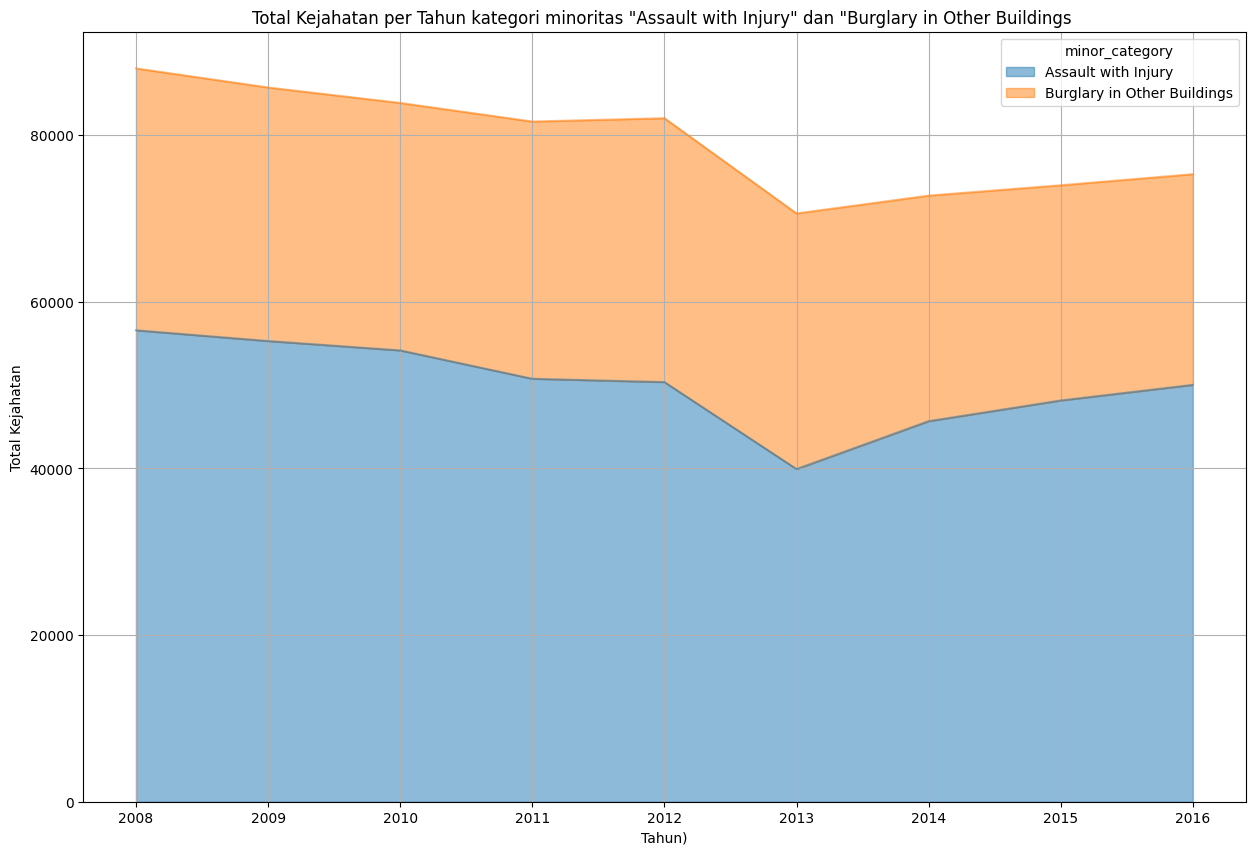

In [19]:
# Membuat Visualisasi stacked = True
df_minoritas.plot(kind='area',
                  alpha=0.5,
                  stacked=True,
                  figsize=(15, 10))
plt.xlabel('Tahun)')
plt.ylabel('Total Kejahatan')
plt.title('Total Kejahatan per Tahun kategori minoritas "Assault with Injury" dan "Burglary in Other Buildings ')
plt.legend(title='minor_category', loc='upper right')
plt.grid()
plt.show()

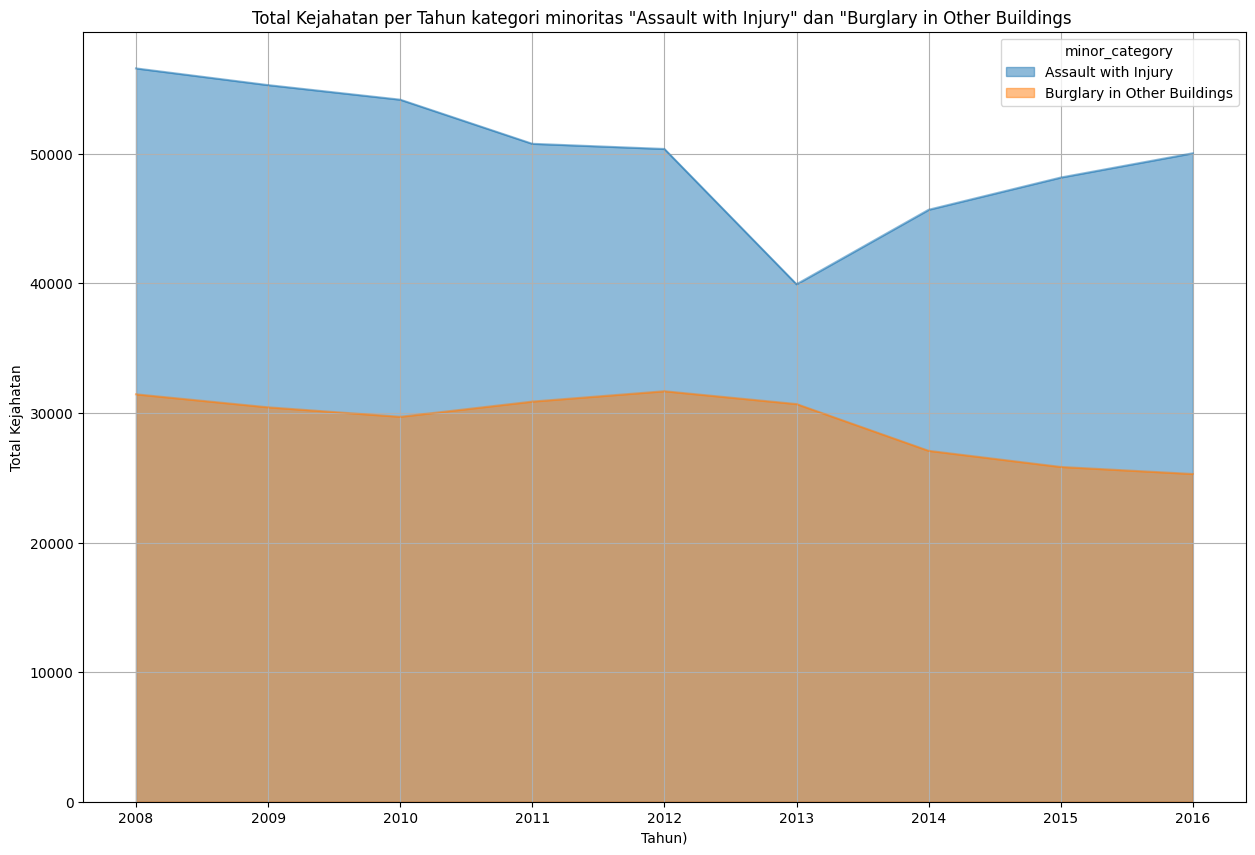

In [20]:
# Membuat Visualisasi stacked = False
df_minoritas.plot(kind='area',
                  alpha=0.5,
                  stacked=False,
                  figsize=(15, 10))
plt.xlabel('Tahun)')
plt.ylabel('Total Kejahatan')
plt.title('Total Kejahatan per Tahun kategori minoritas "Assault with Injury" dan "Burglary in Other Buildings ')
plt.legend(title='minor_category', loc='upper right')
plt.grid()
plt.show()

<H10> Analisis : pada kelas kejahatan minority khsususnya kategori "Assult with Injury" dari tahun 2008 sampai 2013 mengalami penurunan sebesar. dan terjadi penurunan drastis pada tahun 2012 sampai 2013 sebesar 10.440. dan meningkat kembali setelah 2013 sampai 2014 sebesar 5.748. sedangkan pada kategori "Burglary in Other Buildings" tidak terlalu terjadi banyak perubahan yang signifikat dari tahun 2008 sampai 2012. namun tejadi penurunan dari tahun ke tahun dimulai dari tahun 2013 yang lumayan signifikan penurunannya dan sampai 2016 perlahan menurun.

# Historams

Pertanyaan Histograms : Bagaimana Distribusi kejahatan berdasarkan bulan-bulan tertentu dari 2008-2016 ?

In [21]:
histogram = df.groupby(['month'])['value'].sum().reset_index()

bulan = {1: 'Januari',
         2: 'Februari',
         3: 'Maret',
         4: 'April',
         5: 'Mei',
         6: 'Juni',
         7: 'Juli',
         8: 'Agustus',
         9: 'September',
         10: 'Oktober',
         11: 'November',
         12: 'Desember'}
histogram['month'] = histogram['month'].map(bulan)

histogram

,month,value
0,Januari,530247
1,Februari,500537
2,Maret,551795
3,April,520648
4,Mei,552704
5,Juni,549041
6,Juli,563076
7,Agustus,532784
8,September,522377
9,Oktober,558252


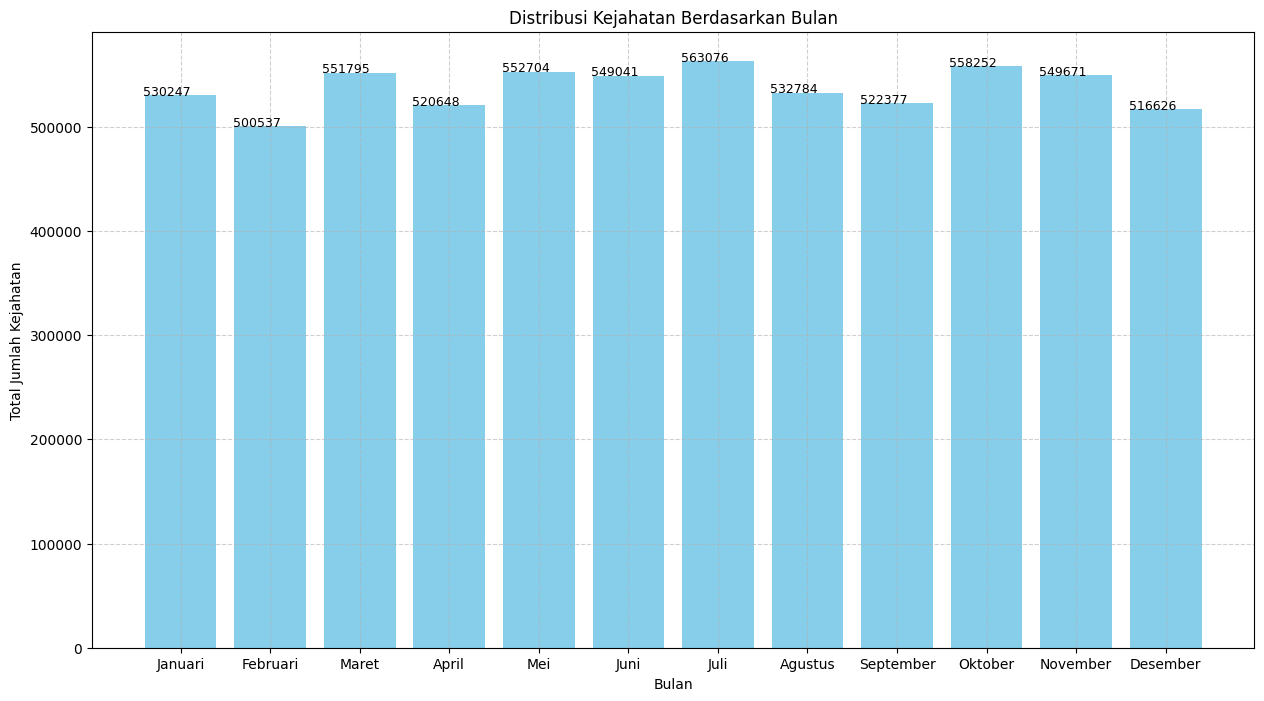

In [22]:
# Plot histogram
plt.figure(figsize=(15, 8))
bars = plt.bar(histogram['month'], histogram['value'], color='skyblue')
plt.bar(histogram['month'], histogram['value'], color='skyblue')
plt.xlabel('Bulan')
plt.ylabel('Total Jumlah Kejahatan')
plt.title('Distribusi Kejahatan Berdasarkan Bulan')
plt.grid(True, linestyle='--', alpha=0.6)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() +
             5, int(bar.get_height()), ha='center', color='black', fontsize=9)
plt.show()

<h10> Analisis : Dari histogram kita dapat melihat distribusi kejahatan dari tahun 2008-2016 pada bulan Januari sampai Desember. Dari situ ktia dapat melihat bahwa total kejahatan terendah terjadi pada februari yakni dengan jumlah total sebesar 500537 tindak kejahatan yang tergabung dari kategori minor dan major. dan berada pada puncak pada bulan Juli.

# Bar Chart

<h10> Pertanyaan Bar Chart : Top wilayah dengan tingkat kejahatan paling tinggi dari tahun 2008 - 2016 ?

In [23]:
top_wilayah = df.groupby('borough')['value'].sum().reset_index()
top_wilayah.set_index('borough', inplace=True)
top_wilayah.index.name = None

top_wilayah = top_wilayah.sort_values(['value'], ascending=False)
top_wilayah

,value
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613
Brent,227551


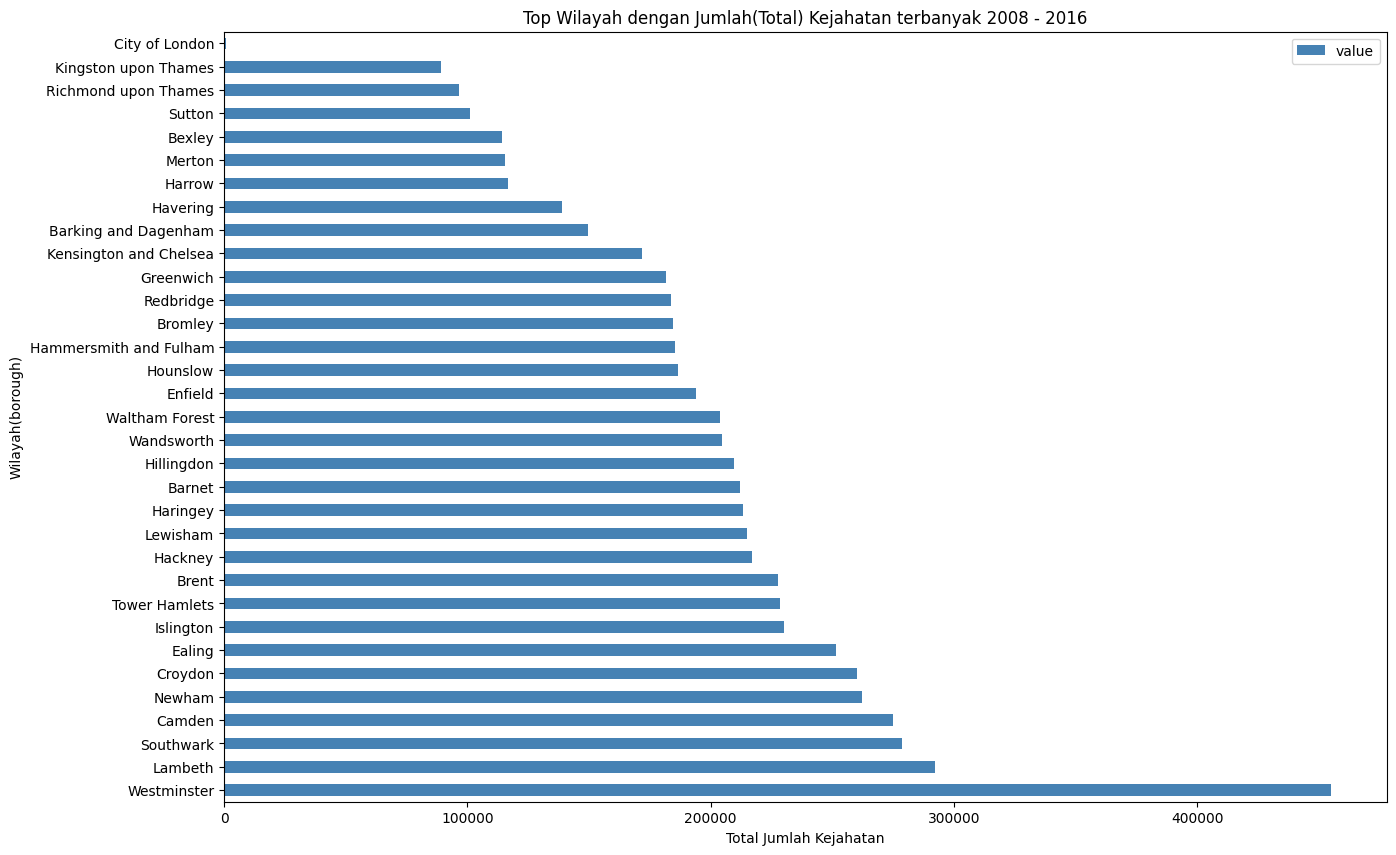

In [26]:
# Membuat visualisasi dengan Bar Chart Hozizontal
top_wilayah.plot(kind='barh',
                 figsize=(15, 10),
                 color='steelblue',)
plt.title("Top Wilayah dengan Jumlah(Total) Kejahatan terbanyak 2008 - 2016")
plt.xlabel('Total Jumlah Kejahatan')
plt.ylabel('Wilayah(borough)')
plt.show()

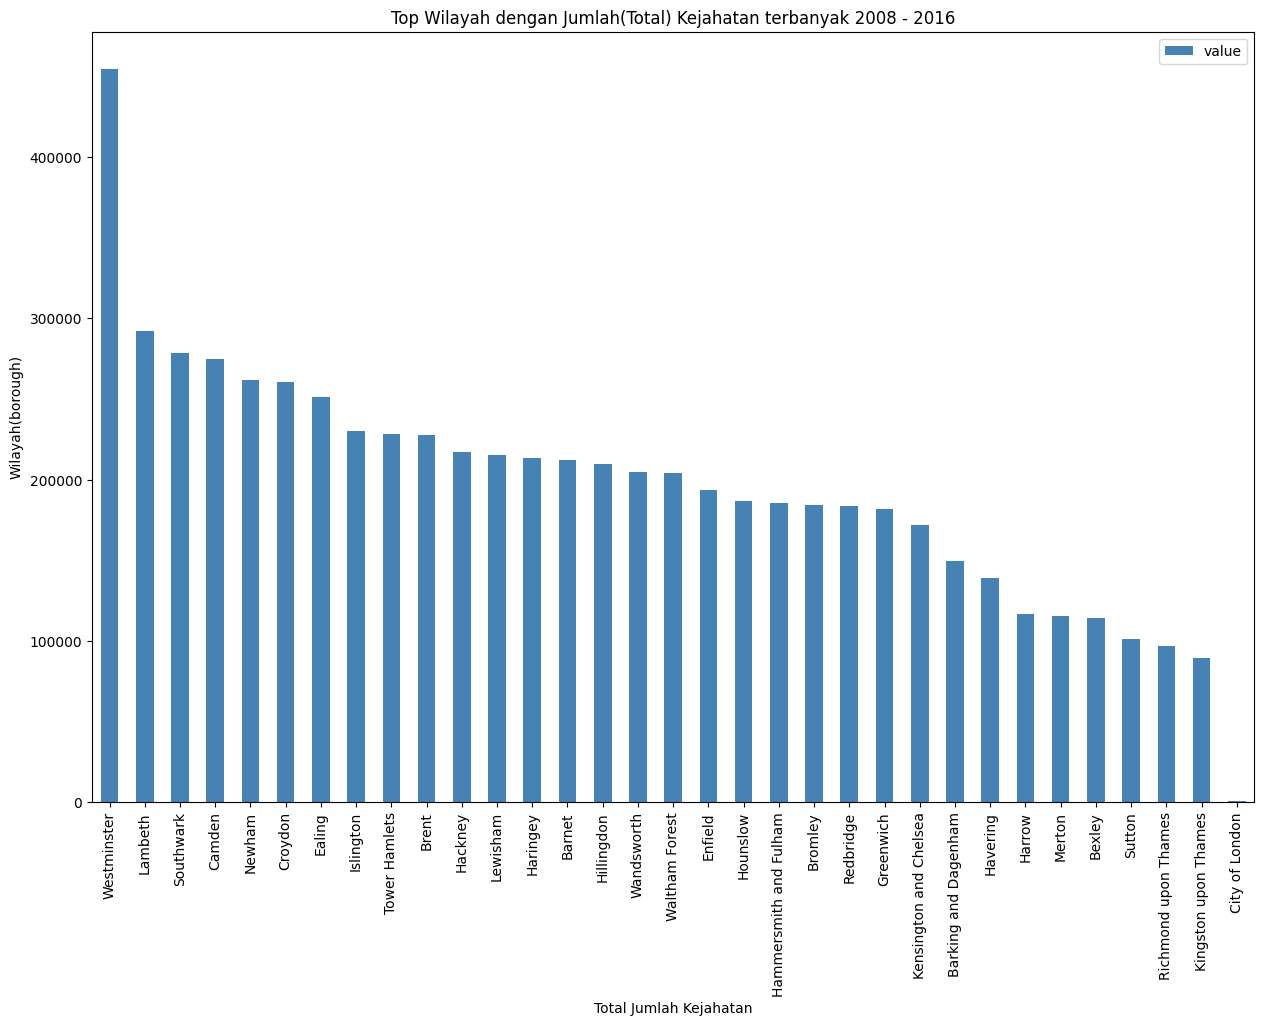

In [27]:
# Membuat visualisasi dengan Bar Chart Vertical
top_wilayah.plot(kind='bar',
                 figsize=(15, 10),
                 color='steelblue')

plt.title("Top Wilayah dengan Jumlah(Total) Kejahatan terbanyak 2008 - 2016")
plt.xlabel('Total Jumlah Kejahatan')
plt.ylabel('Wilayah(borough)')
plt.show()

<h10> Analisis : Dari visualisasi Bar Chart terlihat jelas bahwa wilayah Westminster adalahwilayah dengan total kejahatan paling banyak sehingga menjadi daerah paling tidak aman. sedangkan City of London adalah daerah dengan tingkat kejahatan paling sedikit yang menjadikan london sebagai wilayah paling aman untuk dikunjungi.

# Pie Chart

<h10> Pertanyaan Pie Chart : Bagaimana Komposisi kriminalitas kategori mayoritas dari tahun 2015 sampai 2016?

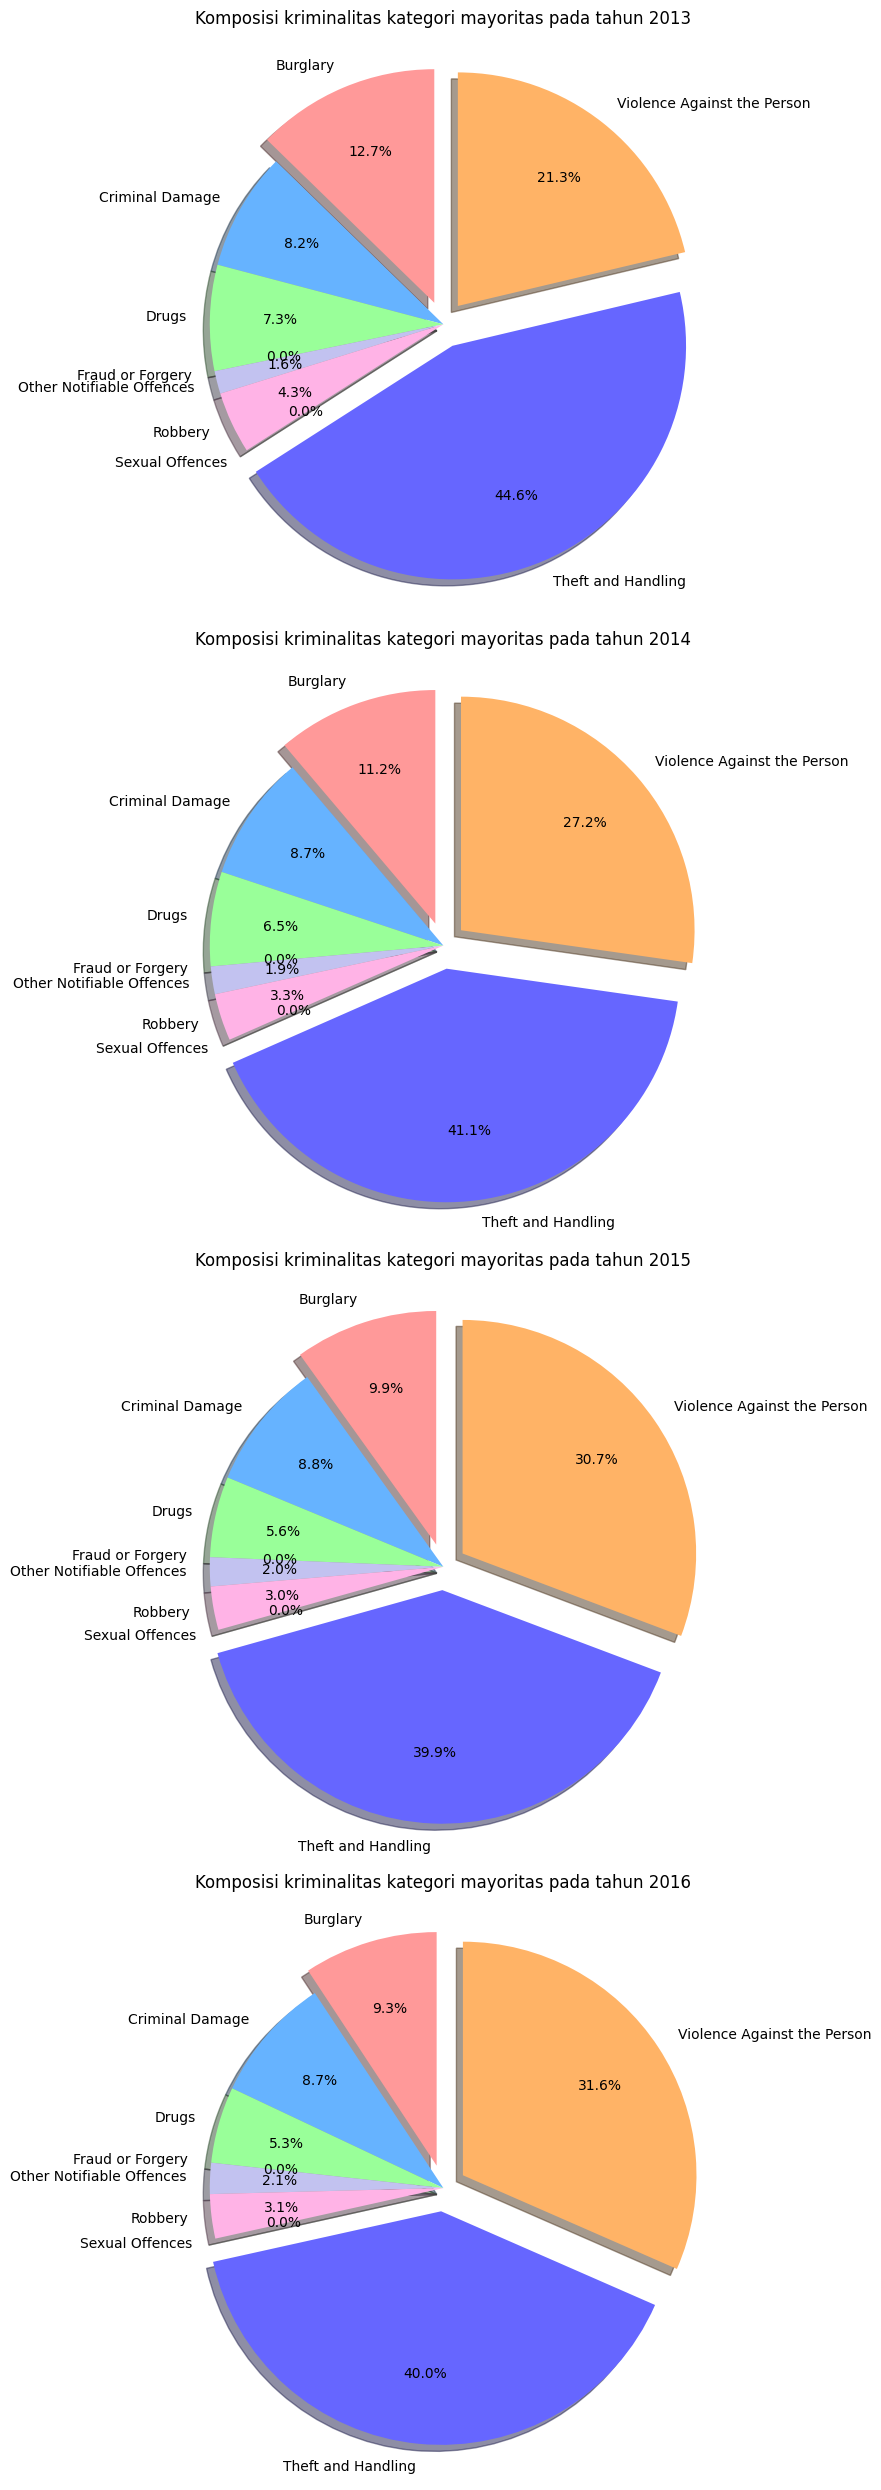

In [28]:
# Explode
potongan = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

# List warna potongan
list_warna = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99',
              '#c2c2f0', '#ffb3e6', '#c2f0c2', '#6666ff', '#ffb366']

# Membuat subplots
fig, axes = plt.subplots(4, 1, figsize=(25, 25))

years = [2013, 2014, 2015, 2016]

for i, year in enumerate(years):
    data_major = df[df['year'] == year]
    major_category = data_major.groupby('major_category')[
        'value'].sum().reset_index()

    # Plot untuk kejahatan mayoritas tahun tertentu dengan persentase
    axes[i].pie(x=major_category['value'],
                labels=major_category['major_category'],
                autopct='%1.1f%%',
                startangle=90,
                shadow=True,
                pctdistance=0.7,  # Jarak persentase dari pusat potongan
                colors=list_warna,
                explode=potongan)
    axes[i].set_title(
        f"Komposisi kriminalitas kategori mayoritas pada tahun {year}")
    axes[i].set_ylabel('')

# Menghilangkan spasi antar subplot
plt.tight_layout()
plt.show()

<h10> Analisis : Dari Pie Chart yang kita buat untuk major_category kriminalitas dari tahun 2013 sampai 2016. dari 3 categori kejahatan terbesar salah satunya kategori "Burglary" mengalami penurunan dari persentase jumlah kejahatan. Sedangkan kategori "Violance Against the Person" mengalami lonjakan setiap tahunya dari tahun 2013 sebesar 21.3% sampai pada 31.6% pada tahun 2016.

# Box Plot

<h10> Pertanyaan Box Plot : Di dataset apakah ada data outlier ?

In [33]:
box_plot = df.groupby(['year'])['value'].sum().reset_index()
box_plot = box_plot.drop(labels='year', axis=1)
box_plot

,value
0,738641
1,717214
2,715324
3,724915
4,737329
5,686407
6,680183
7,711624
8,736121


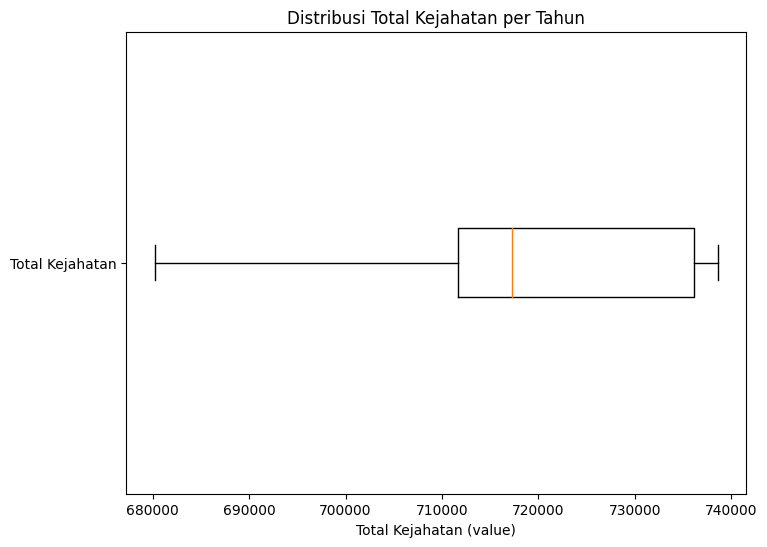

In [34]:
# Create a box plot to visualize the distribution of sums across different years
plt.figure(figsize=(8, 6))
plt.boxplot([box_plot['value']], labels=['Total Kejahatan'], vert=False)
plt.xlabel('Total Kejahatan (value)')
plt.title('Distribusi Total Kejahatan per Tahun')
plt.show()

In [35]:
box_plot.describe()

,value
count,9.000000
mean,716417.555556
std,21301.370555
min,680183.000000
25%,711624.000000
50%,717214.000000
75%,736121.000000
max,738641.000000


<h10> Analisi : Sepertinya tidak ada outlier.

# Scatter Plot

<h10> Pertanyaan Scatter Plot : Apakah ada korelasi antara jumlah kejahatan dan tahun ?

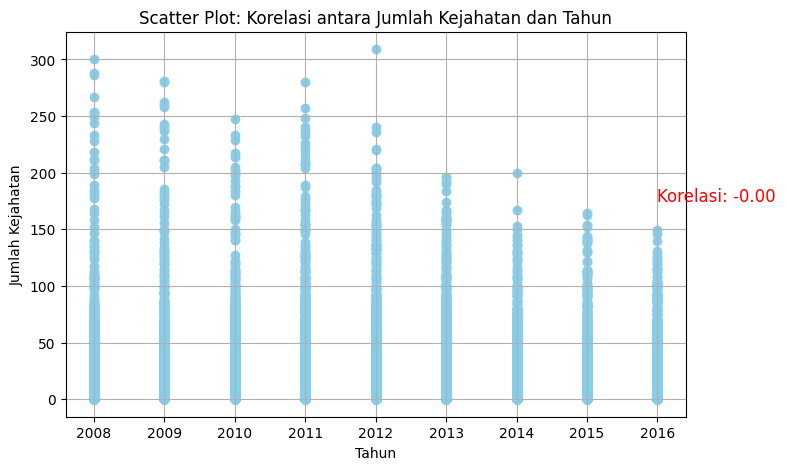

In [32]:
# Membuat scatter plot
plt.figure(figsize=(8, 5))

plt.scatter(df['year'],
            df['value'],
            color='skyblue',
            marker='o')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.title('Scatter Plot: Korelasi antara Jumlah Kejahatan dan Tahun')
plt.grid(True)

# Menghitung koefisien korelasi
correlation = df['year'].corr(df['value'])

plt.text(2016, 175, f'Korelasi: {correlation:.2f}', fontsize=12, color='red')

plt.show()

<h10> Analisis : menurut yang saya lihat ternyata year daan value tidak memiliki korelasi karena 0

# Word Clouds

<h10> Pertanyaan Word Clouds : Kata minor_category apakah yang paling sering muncul ? 

In [36]:
# Mengambil hanya 10 000
text = df['minor_category'].to_list()
text = text[0:10_000]
text = ' '.join(text)
text

'Burglary in Other Buildings Other violence Other violence Burglary in Other Buildings Personal Property Other Theft Offensive Weapon Personal Property Criminal Damage To Other Building Theft/Taking of Pedal Cycle Motor Vehicle Interference & Tampering Other violence Personal Property Offensive Weapon Theft/Taking Of Motor Vehicle Wounding/GBH Other Theft Person Common Assault Theft From Shops Possession Of Drugs Harassment Handling Stolen Goods Criminal Damage To Dwelling Possession Of Drugs Other Theft Person Harassment Theft/Taking Of Motor Vehicle Other violence Wounding/GBH Common Assault Burglary in a Dwelling Criminal Damage To Motor Vehicle Criminal Damage To Motor Vehicle Harassment Offensive Weapon Theft From Shops Criminal Damage To Other Building Other Criminal Damage Handling Stolen Goods Possession Of Drugs Counted per Victim Harassment Possession Of Drugs Other Theft Theft/Taking Of Motor Vehicle Going Equipped Other Criminal Damage Theft From Shops Other violence Offens

In [37]:
# Buat WordCloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white').generate(text)

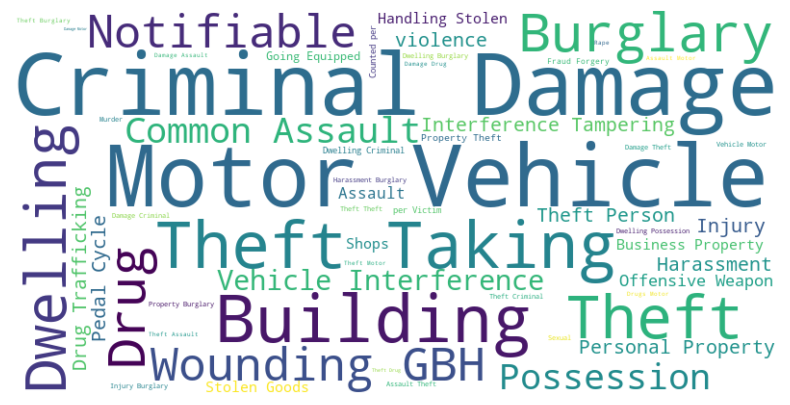

In [38]:
# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h10> Analisis : Tambah kata yang paling tebal dan paling besar hurufnya mengartikan bahwa kata tersebut adalah kata yang paling sering muncul. dalam hal ini yang dimaksud ada minor_category. yakni categori minor yang paling sering dan banyak muncul di banding minor category lainya.

# Overall Analysis

Ketika kita memulai proses visualisasi data, langkah pertama yang sangat penting adalah memastikan bahwa data yang akan divisualisasikan sudah bersih dan telah melalui proses preprocessing yang diperlukan. Setelah data bersih, langkah berikutnya adalah menentukan tujuan dari visualisasi tersebut. Tujuan ini akan memandu kita dalam pemilihan jenis plot yang paling sesuai untuk menganalisis data yang ada.

Sebagai contoh, kita dapat menggunakan Bar Chart untuk membandingkan tingkat kejahatan tertinggi dari tahun 2008 hingga 2016. Histograms sangat berguna untuk melihat distribusi tingkat kejahatan dari tahun 2008 hingga 2016, terutama pada setiap bulan, mulai dari Januari hingga Desember. Selain itu, Area Plot digunakan untuk mengidentifikasi tren peningkatan atau penurunan tingkat kejahatan dalam periode tertentu pada kategori yang relevan.

Pie Chart berguna untuk memvisualisasikan perkembangan tingkat kejahatan dari satu periode ke periode berikutnya dengan cara yang sangat visual dan mudah dimengerti. Sementara itu, Box Plot dapat membantu kita mengidentifikasi outlier, yaitu kejadian yang sangat jarang atau sangat sering terjadi dalam data.

Scatter Plot merupakan alat yang efektif untuk menganalisis korelasi antara dua fitur atau kolom tertentu, misalnya mencari korelasi antara "year" dan "value". Terakhir, Word Clouds berguna untuk menyajikan kata-kata atau kategori kejahatan yang paling sering terjadi secara visual, memudahkan kita untuk mengidentifikasi pola dan fokus pada aspek-aspek utama dari data tersebut.

Dengan menggabungkan berbagai jenis plot ini dalam analisis data, kita dapat mengungkapkan pola, tren, dan wawasan yang berharga dari dataset yang telah dibersihkan, serta menjawab pertanyaan-pertanyaan yang relevan terkait data tersebut.